# linear differential cryptanalysis

tutorial on **linear** cryptanalysis and **differential** cryptanalysis, the two most significant attacks applicable to symmetric-key block ciphers.

more resource

[A Tutorial on Linear and Differential Cryptanalysis](https://www.yuque.com/xjh2000/cipher-paper/rhoufp5noo8apsmo?singleDoc)


## Subsitution

The most fundamental property of an S-box is that it is a nonlinear mapping, i.e., the output bits cannot be represented as a linear operation on the input bits.

we chose one 4-bit sbox.

| 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | A | B | C | D | E | F | 
| -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | 
| E | 4 | D | 1 | 2 | F | B | 8 | 3 | A | 6 | C | 5 | 9 | 0 | 7 | 


In [25]:
sbox = list(
    [0xE, 0x4, 0xD, 0x1, 0x2, 0xF, 0xB, 0x8, 0x3, 0xA, 0x6, 0xC, 0x5, 0x9, 0x0, 0x7]
)
print(sbox)

# involution sbox ?
for i in range(len(sbox)):
    if i != sbox[sbox[i]]:
        print(
            f"i = {i}, sbox[i] = {sbox[i]}, sbox[sbox[i]] = {sbox[sbox[i]]} sbox is not involution"
        )
        break

[14, 4, 13, 1, 2, 15, 11, 8, 3, 10, 6, 12, 5, 9, 0, 7]
i = 1, sbox[i] = 4, sbox[sbox[i]] = 2 sbox is not involution


## Permutation
The permutation portion of a round is simply the tranposition of the bits or the permutation of the bit positions. 

| 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 | 
| -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | 
| 1 | 5 | 9 | 13 | 2 | 6 | 10 | 14 | 3 | 7 | 11 | 15 | 4 | 8 | 12 | 16 |

In [68]:
permutation = list([0, 4, 8, 12, 1, 5, 9, 13, 2, 6, 10, 14, 3, 7, 11, 15])
print(permutation)

# involution permutation ?
for i in range(len(permutation)):
    if i != permutation[permutation[i] ] :
        print(
            f"i = {i}, permutation[i] = {permutation[i]}, permutation[permutation[i]] = {permutation[permutation[i]]} "
        )
        print("permutation is not involution")
        break

[0, 4, 8, 12, 1, 5, 9, 13, 2, 6, 10, 14, 3, 7, 11, 15]


## Cipher Structure

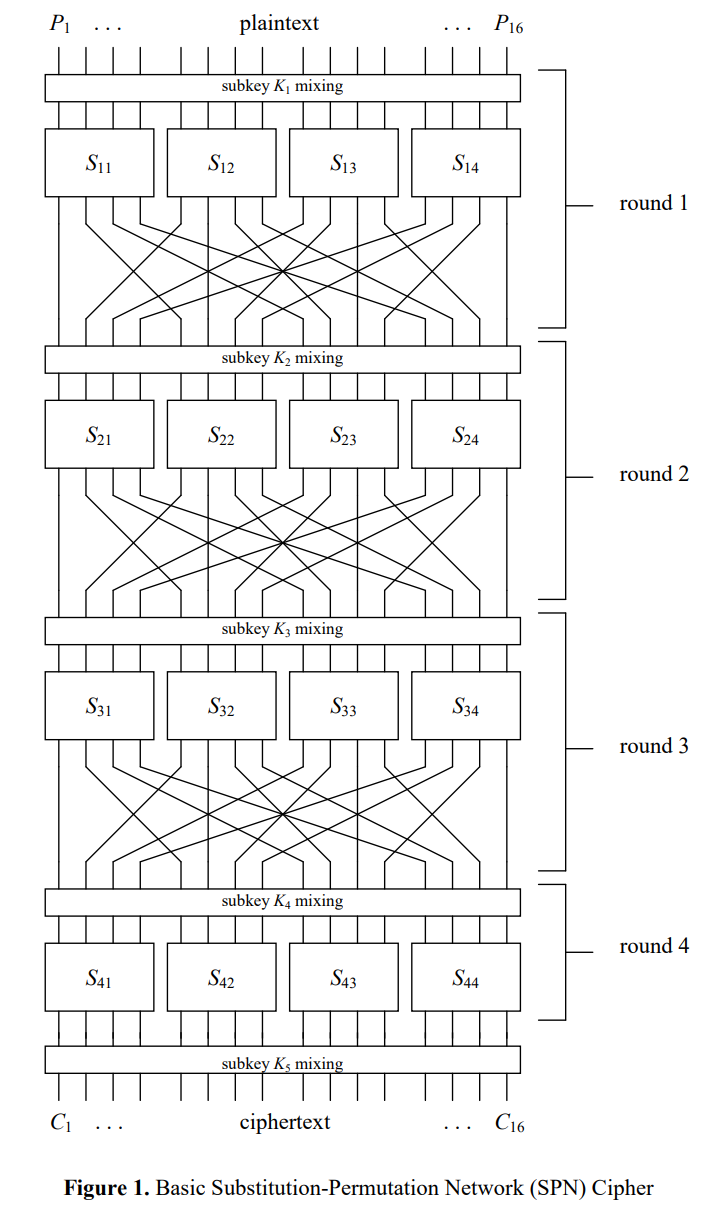

In [64]:
# add some tools function


def bin_to_int(bin_str):
    return int(bin_str, 2)

def int_to_bin(input_int, num_bits):
    # Convert the integer to binary and remove the '0b' prefix
    binary = bin(input_int)[2:]

    # Pad the binary number with zeros on the left if necessary
    binary = binary.zfill(num_bits)

    # Convert the binary string to a list of bits
    return list(map(int, binary))

def permute(input, permutation_table):
    # Create a new string with the same length as the permutation table
    output = [0] * len(permutation_table)

    # For each bit in the input
    for i in range(len(permutation_table)):
        # Move the bit at the position specified in the permutation table
        output[i] = input[permutation_table[i]]

    return output

In [77]:
def encrypt(
    plaintext: list, key1: list, key2: list, key3: list, key4: list, key5: list
):
    state = plaintext

    # round 1
    # add key
    state = [state[i] ^ key1[i] for i in range(len(state))]
    # subsitute
    state = [sbox[state[i]] for i in range(len(state))]
    # bit permutation
    # Please be aware that this operation may take a significant amount of time to complete. 
    # This is due to the fact that Python does not natively support bit-level operations.
    state_b = [item for i in range(len(state)) for item in int_to_bin(state[i], 4)]
    state_b = permute(state_b, permutation)
    state = [
        bin_to_int("".join([str(state_b[i]) for i in range(j * 4, (j + 1) * 4)]))
        for j in range(4)
    ]
    # round 2
    state = [state[i] ^ key2[i] for i in range(len(state))]
    state = [sbox[state[i]] for i in range(len(state))]
    state_b = [item for i in range(len(state)) for item in int_to_bin(state[i], 4)]
    state_b = permute(state_b, permutation)
    state = [
        bin_to_int("".join([str(state_b[i]) for i in range(j * 4, (j + 1) * 4)]))
        for j in range(4)
    ]
    # round 3
    state = [state[i] ^ key3[i] for i in range(len(state))]
    state = [sbox[state[i]] for i in range(len(state))]
    state_b = [item for i in range(len(state)) for item in int_to_bin(state[i], 4)]
    state_b = permute(state_b, permutation)
    state = [
        bin_to_int("".join([str(state_b[i]) for i in range(j * 4, (j + 1) * 4)]))
        for j in range(4)
    ]

    # round 4
    state = [state[i] ^ key4[i] for i in range(len(state))]
    state = [sbox[state[i]] for i in range(len(state))]
    # add key5 at last, avoid last round sbox backward through
    state = [state[i] ^ key5[i] for i in range(len(state))]
    return state